In [20]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
cancer = load_breast_cancer()

Text(0.5, 0, 'feature 1')

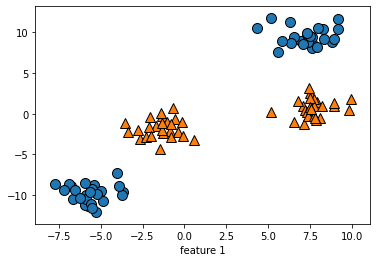

In [8]:
X,y = make_blobs(centers=4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel("feature 0")
plt.xlabel("feature 1")

Text(0, 0.5, 'feature 1')

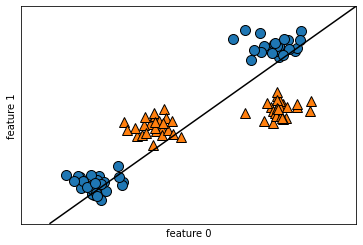

In [13]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0.5, 0, 'feature1 ** 2')

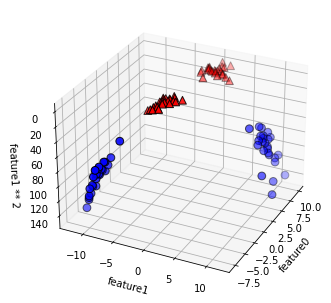

In [11]:
X_new = np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2], c='r',marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

Text(0.5, 0, 'feature1 ** 2')

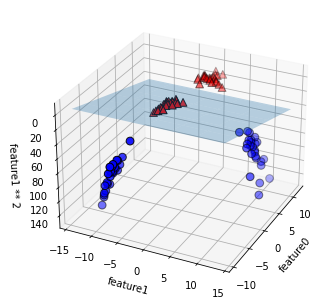

In [12]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX+coef[1]+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ, rstride=8, cstride=8, alpha=.3)

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2], c='r',marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

Text(0, 0.5, 'feature 1')

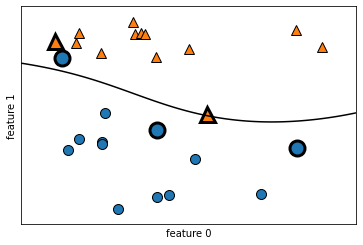

In [16]:
from sklearn.svm import SVC

X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1], y)

sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

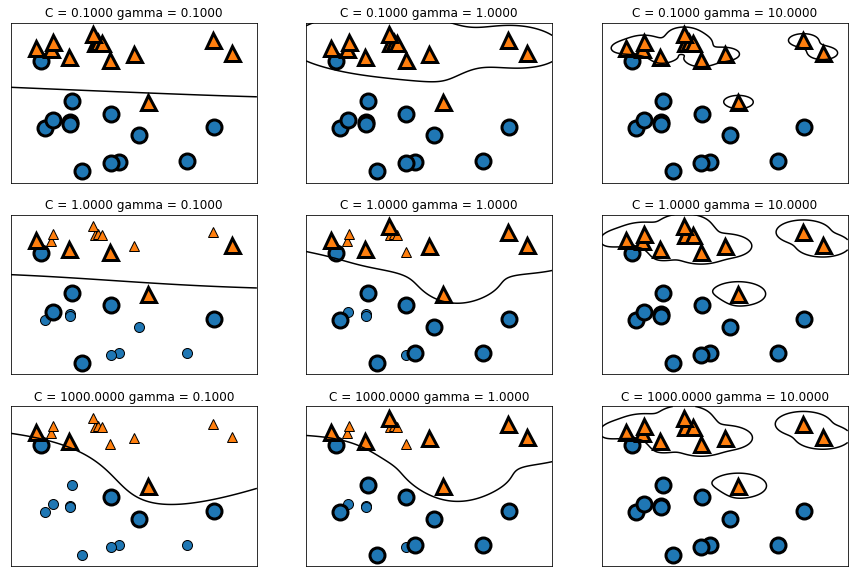

In [19]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma = gamma, ax=a)
        

In [26]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("train set score:",svc.score(X_train,y_train))
print("test set score:",svc.score(X_test,y_test))

train set score: 0.903755868544601
test set score: 0.9370629370629371


In [22]:
min_on_training = X_train.min(axis=0)

range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train-min_on_training) / range_on_training
print("feature min", X_train_scaled.min(axis=0))
print("feature max", X_train_scaled.max(axis=0))

feature min [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
feature max [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [23]:
X_test_scaled = (X_test-min_on_training) / range_on_training

In [27]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("train set score:",svc.score(X_train_scaled,y_train))
print("test set score:",svc.score(X_test_scaled,y_test))

train set score: 0.9835680751173709
test set score: 0.972027972027972
